<a href="https://colab.research.google.com/github/saumyadash9/Saumya-Dash-Rossmann-Sales-Prediction---Capstone-Project.ipynb/blob/main/Saumya_Dash_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [499]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
lin= LinearRegression()
import warnings    
warnings.filterwarnings('ignore')

In [500]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [501]:
df_sales = pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')
df_stores = pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

In [502]:
df_sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [503]:
df_stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [504]:
df_sales.shape

(1017209, 9)

In [505]:
df_stores.shape

(1115, 10)

In [506]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [507]:
1115/1017209*100

0.10961365855001283

In [508]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [509]:
df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [510]:
#promo = 0, competition - mode 

In [511]:
df_stores.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [512]:
df_stores.CompetitionOpenSinceMonth.unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [513]:
df_stores.CompetitionOpenSinceMonth.value_counts() 

9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: CompetitionOpenSinceMonth, dtype: int64

In [514]:
df_stores.CompetitionOpenSinceYear.value_counts() 

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2009.0    54
2011.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1961.0     1
1900.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

In [515]:
354/1115*100

31.748878923766817

In [516]:
'''Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval  '''

'Promo2SinceWeek              544\nPromo2SinceYear              544\nPromoInterval  '

In [517]:
df_stores['Promo2SinceWeek'] = df_stores['Promo2SinceWeek'].fillna(0)

In [518]:
df_stores.Promo2SinceWeek.isnull().sum()

0

In [519]:
df_stores['Promo2SinceYear'] = df_stores['Promo2SinceYear'].fillna(0)

In [520]:
df_stores['PromoInterval'] = df_stores['PromoInterval'].fillna(0)

In [521]:
df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
dtype: int64

In [522]:
df_stores['PromoInterval'] = df_stores['PromoInterval'].fillna(0)

In [523]:
df_stores["CompetitionDistance"].fillna(df_stores["CompetitionDistance"].median(),inplace=True)
df_stores["CompetitionOpenSinceMonth"].fillna(df_stores["CompetitionOpenSinceMonth"].mode()[0],inplace=True)
df_stores["CompetitionOpenSinceYear"].fillna(df_stores["CompetitionOpenSinceYear"].mode()[0],inplace=True)

In [524]:
df_stores = df_stores.dropna(how='all', axis=1)

In [525]:
df_stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [526]:
new_dataset = pd.merge(df_sales,df_stores, how = 'left', on = 'Store')

In [527]:
new_dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [528]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [529]:
new_dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [530]:
new_dataset = new_dataset[new_dataset.Open == 1]

In [531]:
new_dataset.drop("Open",axis=1, inplace= True)

In [532]:
new_dataset["Store"][new_dataset["Sales"]==0].sum()

31460

In [533]:
round((new_dataset["Store"][new_dataset["Sales"]==0].sum()/new_dataset["Store"].sum()*100) ,4)

0.0067

In [534]:
new_dataset = new_dataset[new_dataset.Sales!=0]

In [535]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  float64
 12  CompetitionOpenSinceYear   844338 non-null  float64
 13  Promo2                     8

In [536]:
Weekend = []
for row in new_dataset['DayOfWeek']:
    if row < 6 :    Weekend.append(0)        
      
    else:           Weekend.append(1)

In [537]:
new_dataset['Weekend'] = pd.Series(Weekend)

In [538]:
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0.0
1,2,5,2015-07-31,6064,625,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0
2,3,5,2015-07-31,8314,821,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0
3,4,5,2015-07-31,13995,1498,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0.0
4,5,5,2015-07-31,4822,559,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0.0


In [539]:
continuous_variable_list = ["Customers","CompetitionDistance"]

In [540]:
categorical_variable_list = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [541]:
def extract_year(x):
    return int(str(x)[:4])

def extract_month(x):
    return int(str(x)[5:7])

def extract_month_year(x):
    return (str(x)[:7])

In [542]:
new_dataset['Date'] = new_dataset['Date'].apply(extract_month_year)
df_sales['Date'] = df_sales['Date'].apply(extract_month_year)
new_dataset['Year']  = new_dataset['Date'].apply(extract_year)
new_dataset['Month'] = new_dataset['Date'].apply(extract_month)
df_sales['Year']  = df_sales['Date'].apply(extract_year)
df_sales['Month'] = df_sales['Date'].apply(extract_month)

In [543]:
for i in categorical_variable_list:
  print(f'Unique values of {i} column are {new_dataset[i].unique()} ')
  print("\n")

Unique values of DayOfWeek column are [5 4 3 2 1 7 6] 


Unique values of Promo column are [1 0] 


Unique values of StateHoliday column are ['0' 'a' 'b' 'c' 0] 


Unique values of SchoolHoliday column are [1 0] 


Unique values of StoreType column are ['c' 'a' 'd' 'b'] 


Unique values of Assortment column are ['a' 'c' 'b'] 


Unique values of CompetitionOpenSinceMonth column are [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.] 


Unique values of CompetitionOpenSinceYear column are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 


Unique values of Promo2 column are [0 1] 


Unique values of Promo2SinceWeek column are [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 


Unique values of Promo2SinceYear column are [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] 


Unique values of PromoInterval column are [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug

In [544]:
new_dataset.StoreType.value_counts()

a    457042
d    258768
c    112968
b     15560
Name: StoreType, dtype: int64

In [545]:
Average_Storewise_sales = new_dataset.groupby('StoreType')['Store'].mean()

In [546]:
print(Average_Storewise_sales)

StoreType
a    560.087410
b    555.930077
c    608.222337
d    533.887432
Name: Store, dtype: float64


In [547]:
x = ['Store','DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear','Sales']

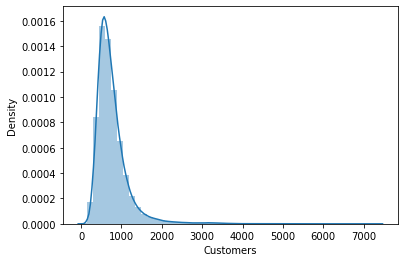

In [548]:
sns.distplot(new_dataset['Customers'])
plt.show()

In [549]:
new_dataset["sqrt_Customers"] = np.sqrt(new_dataset["Customers"])

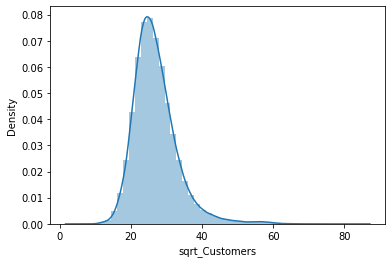

In [550]:
sns.distplot(new_dataset['sqrt_Customers'])
plt.show()

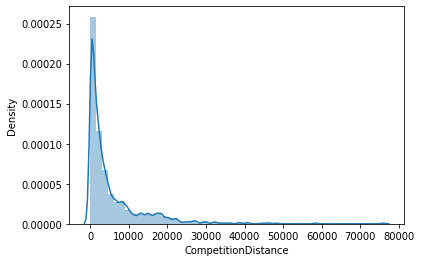

In [551]:
sns.distplot(new_dataset['CompetitionDistance'])
plt.show()

In [552]:
new_dataset["log_CompetitionDistance"] = np.log(new_dataset["CompetitionDistance"])

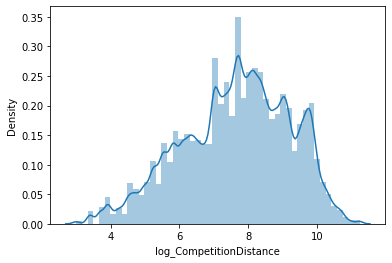

In [553]:
sns.distplot(new_dataset["log_CompetitionDistance"])
# plt.rcParams["figure.figsize"] = (15,3)
plt.show()

In [554]:
new_dataset["sqrt_CompetitionDistance"] = np.sqrt(new_dataset["CompetitionDistance"])

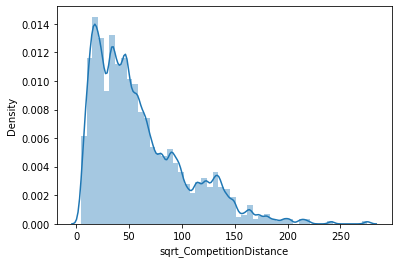

In [555]:
sns.distplot(new_dataset["sqrt_CompetitionDistance"])
# plt.rcParams["figure.figsize"] = (15,3)
plt.show()

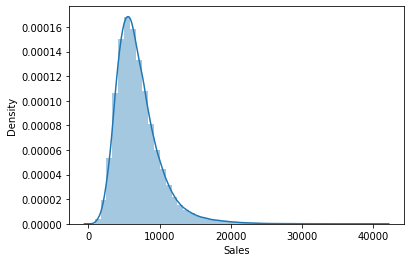

In [556]:
sns.distplot(new_dataset['Sales'])
plt.show()

In [557]:
new_dataset["sqrt_Sales"] = np.sqrt(new_dataset["Sales"])

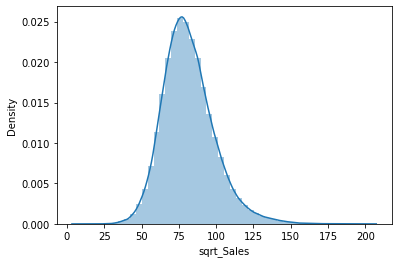

In [558]:
sns.distplot(new_dataset['sqrt_Sales'])
plt.show()

In [559]:
categorical_variable_list = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [560]:
cat_df = new_dataset[categorical_variable_list]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe70d582310>,
      dtype=object)

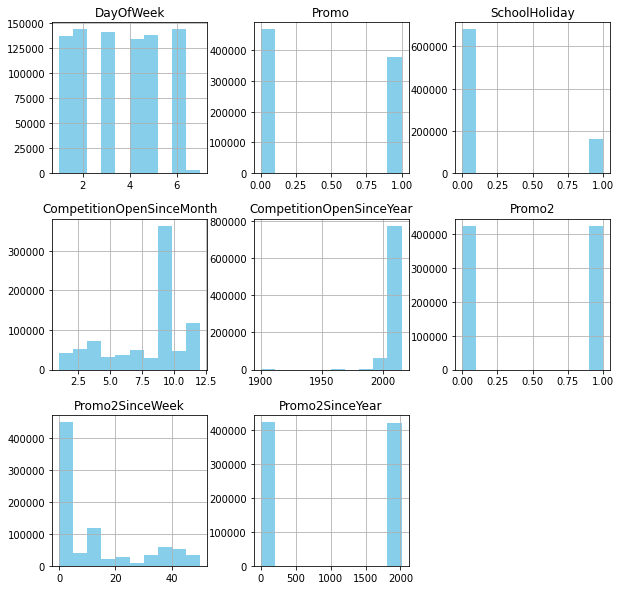

In [561]:
cat_df.hist(color = 'skyblue', figsize= (10,10))

In [562]:
# Bivariate 

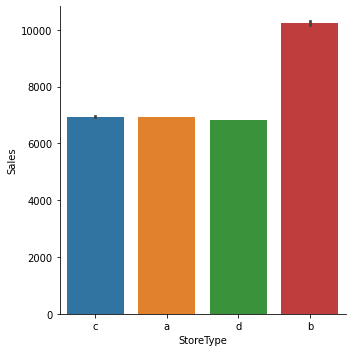

In [563]:
sns.catplot(data=new_dataset, x="StoreType", y="Sales", kind="bar")

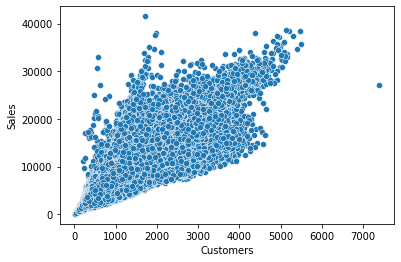

In [564]:
sns.scatterplot(x=new_dataset['Customers'], y=new_dataset['Sales'])

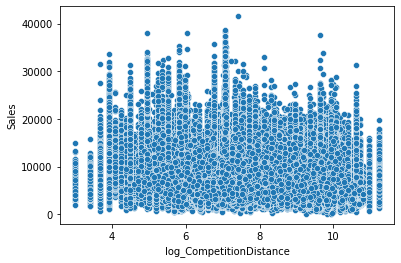

In [565]:
sns.scatterplot(x=new_dataset['log_CompetitionDistance'], y=new_dataset['Sales'])

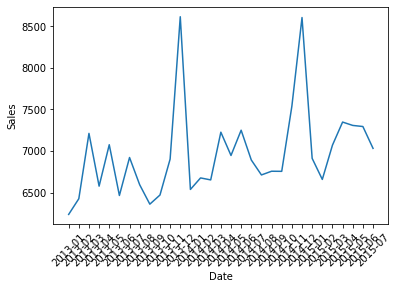

In [566]:
sns.lineplot(data=new_dataset.groupby('Date')['Sales'].mean().reset_index(), x='Date', y='Sales')
plt.xticks(rotation= 45)
plt.show()

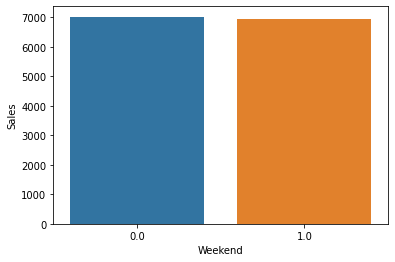

In [567]:
sns.barplot(data=new_dataset.groupby('Weekend')['Sales'].mean().reset_index(), x='Weekend', y='Sales')
plt.show()

In [568]:
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Weekend,Year,Month,sqrt_Customers,log_CompetitionDistance,sqrt_CompetitionDistance,sqrt_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0.0,0.0,0,0.0,2015,7,23.558438,7.146772,35.637059,72.546537
1,2,5,2015-07,6064,625,1,0,1,a,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0,2015,7,25.000000,6.345636,23.874673,77.871689
2,3,5,2015-07,8314,821,1,0,1,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0,2015,7,28.653098,9.556055,118.869677,91.181138
3,4,5,2015-07,13995,1498,1,0,1,c,c,...,0.0,0.0,0,0.0,2015,7,38.704005,6.429719,24.899799,118.300465
4,5,5,2015-07,4822,559,1,0,1,a,a,...,0.0,0.0,0,0.0,2015,7,23.643181,10.305948,172.945078,69.440622


In [569]:
new_dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Weekend', 'Year', 'Month',
       'sqrt_Customers', 'log_CompetitionDistance', 'sqrt_CompetitionDistance',
       'sqrt_Sales'],
      dtype='object')

<Figure size 1152x576 with 0 Axes>

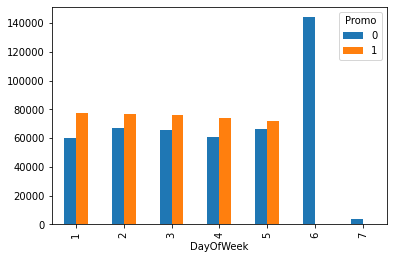

<Figure size 1152x576 with 0 Axes>

In [570]:
new_dataset.groupby(['DayOfWeek','Promo'])['Store'].count().unstack().plot.bar()
plt.figure(figsize=(16,8))

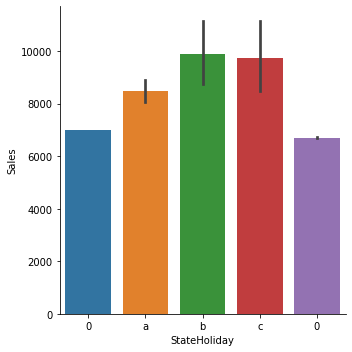

In [571]:
sns.catplot(data=new_dataset, x="StateHoliday", y="Sales", kind="bar")

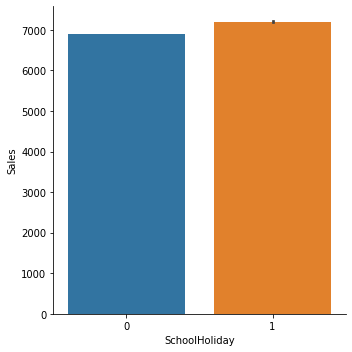

In [572]:
sns.catplot(data=new_dataset, x="SchoolHoliday", y="Sales", kind="bar")

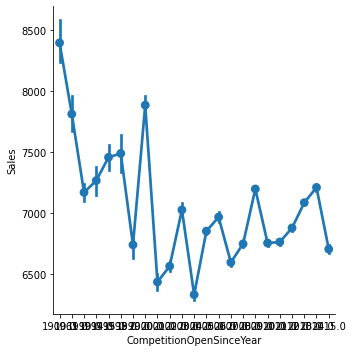

In [573]:
sns.catplot(data=new_dataset, x="CompetitionOpenSinceYear", y="Sales", kind="point")

In [574]:
new_dataset["Avg_Customer_Sales"] = new_dataset.Sales / new_dataset.Customers

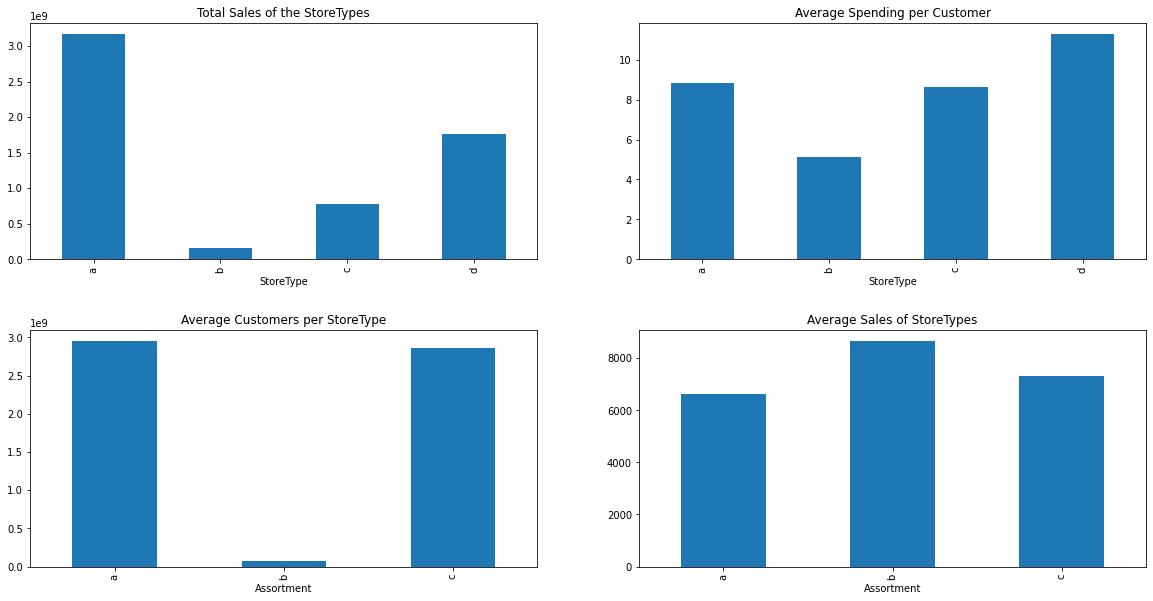

In [575]:
f, ax = plt.subplots(2, 2, figsize = (20,10))

new_dataset.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,0], title = "Total Sales of the StoreTypes")
new_dataset.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[0,1], title = "Average Spending per Customer")
new_dataset.groupby("Assortment")["Sales"].sum().plot(kind = "bar", ax = ax[1,0], title = "Average Customers per StoreType")
new_dataset.groupby("Assortment")["Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Sales of StoreTypes")

plt.subplots_adjust(hspace = 0.3)
plt.show()

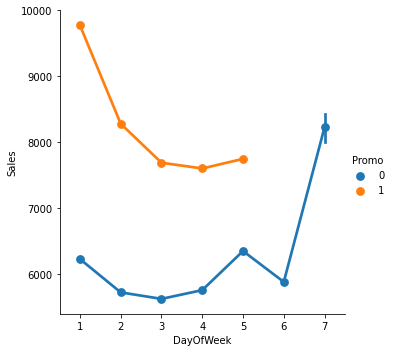

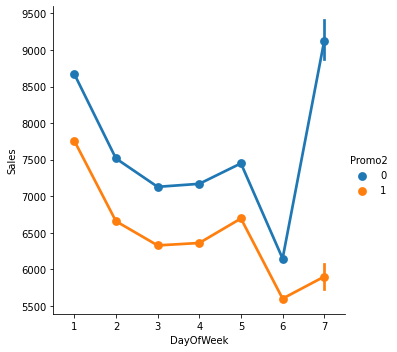

In [576]:
sns.factorplot(data =new_dataset, x = "DayOfWeek", y = "Sales", hue = "Promo")
sns.factorplot(data = new_dataset, x = "DayOfWeek", y = "Sales", hue = "Promo2")

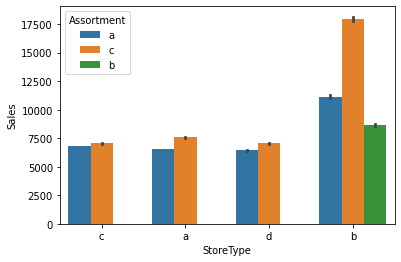

In [577]:
sns.barplot(x=new_dataset["StoreType"],y=new_dataset['Sales'],hue=new_dataset["Assortment"])

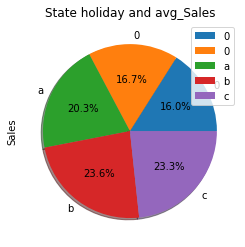

In [578]:
new_dataset.groupby("StateHoliday")["Sales"].mean().plot.pie(title='State holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

In [579]:
#Multivariate

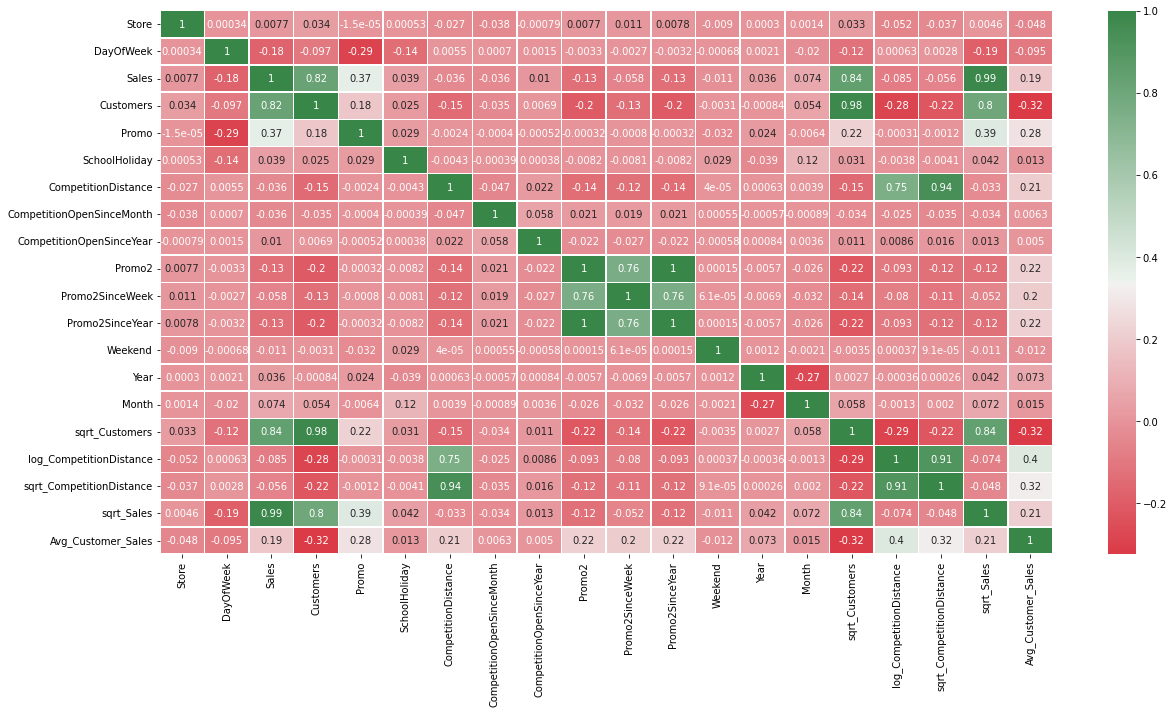

In [580]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(new_dataset.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

**Feature Engineering**

In [581]:
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,PromoInterval,Weekend,Year,Month,sqrt_Customers,log_CompetitionDistance,sqrt_CompetitionDistance,sqrt_Sales,Avg_Customer_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0.0,0,0.0,2015,7,23.558438,7.146772,35.637059,72.546537,9.482883
1,2,5,2015-07,6064,625,1,0,1,a,a,...,2010.0,"Jan,Apr,Jul,Oct",0.0,2015,7,25.000000,6.345636,23.874673,77.871689,9.702400
2,3,5,2015-07,8314,821,1,0,1,a,a,...,2011.0,"Jan,Apr,Jul,Oct",0.0,2015,7,28.653098,9.556055,118.869677,91.181138,10.126675
3,4,5,2015-07,13995,1498,1,0,1,c,c,...,0.0,0,0.0,2015,7,38.704005,6.429719,24.899799,118.300465,9.342457
4,5,5,2015-07,4822,559,1,0,1,a,a,...,0.0,0,0.0,2015,7,23.643181,10.305948,172.945078,69.440622,8.626118


In [582]:
# One hot encoding
new_dataset= pd.get_dummies(new_dataset,columns=['StoreType','Assortment','Year'])

In [583]:
new_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,Year_2013,Year_2014,Year_2015
0,1,5,2015-07,5263,555,1,0,1,1270.0,9.0,...,0,0,1,0,1,0,0,0,0,1
1,2,5,2015-07,6064,625,1,0,1,570.0,11.0,...,1,0,0,0,1,0,0,0,0,1
2,3,5,2015-07,8314,821,1,0,1,14130.0,12.0,...,1,0,0,0,1,0,0,0,0,1
3,4,5,2015-07,13995,1498,1,0,1,620.0,9.0,...,0,0,1,0,0,0,1,0,0,1
4,5,5,2015-07,4822,559,1,0,1,29910.0,4.0,...,1,0,0,0,1,0,0,0,0,1


In [584]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [585]:
calc_vif(new_dataset[[i for i in new_dataset.describe().columns if i not in ['Store','Sales','Weekend','sqrt_Sales']]])

,variables,VIF
0,DayOfWeek,1.125964e+00
1,Customers,2.978450e+01
2,Promo,1.375262e+00
3,SchoolHoliday,1.034508e+00
4,CompetitionDistance,3.044894e+01
5,CompetitionOpenSinceMonth,1.015617e+00
6,CompetitionOpenSinceYear,1.017601e+00
7,Promo2,8.000669e+05
8,Promo2SinceWeek,2.560855e+00
9,Promo2SinceYear,7.995095e+05


In [586]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 32 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   CompetitionDistance        844338 non-null  float64
 9   CompetitionOpenSinceMonth  844338 non-null  float64
 10  CompetitionOpenSinceYear   844338 non-null  float64
 11  Promo2                     844338 non-null  int64  
 12  Promo2SinceWeek            844338 non-null  float64
 13  Promo2SinceYear            8

In [587]:
new_dataset["StateHoliday"] =new_dataset["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [588]:
y= new_dataset["sqrt_Sales"]
x1= new_dataset[['DayOfWeek','log_CompetitionDistance','sqrt_Customers','StateHoliday', 'SchoolHoliday','Promo','Promo2','StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek']]

In [590]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
# std = StandardScaler()
# X_train_std = std.fit_transform(X_train)
# X_test_std = std.transform(X_test)

In [591]:
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sqrt_Sales   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.127e+05
Date:                Sat, 26 Nov 2022   Prob (F-statistic):               0.00
Time:                        20:06:02   Log-Likelihood:            -2.7739e+06
No. Observations:              844338   AIC:                         5.548e+06
Df Residuals:                  844320   BIC:                         5.548e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        24.8771      1.395     17.831      0.000      22.143      27.612
DayOfWeek                    -0.1074      0.004    -24.840      0.000      -0.116      -0.099
log_CompetitionDistance       1.5960      0.005    320.106      0.000       1.586       1.606
sqrt_Customers                2.7270      0.001   1973.339      0.000       2.724       2.730
StateHoliday                  0.7250      0.216      3.357      0.001       0.302       1.148
SchoolHoliday                 0.3583      0.018     19.897      0.000       0.323       0.394
Promo                         5.9921      0.015    393.886      0.000       5.962       6.022
Promo2                        1.4403      0.022     64.794      0.000       1.397       1.484
StoreType_a                   8.2318      0.349     23.588      0.000       7.548       8.916
StoreType_b                  -5.6270      0.355    -15.854      0.000      -6.323      -4.931
StoreType_c                   7.2875      0.349     20.888      0.000       6.604       7.971
StoreType_d                  14.9848      0.350     42.847      0.000      14.299      15.670
Assortment_a                 14.7857      0.466     31.713      0.000      13.872      15.700
Assortment_b                 -6.1208      0.469    -13.045      0.000      -7.040      -5.201
Assortment_c                 16.2122      0.468     34.673      0.000      15.296      17.129
Year_2013                     7.5217      0.465     16.171      0.000       6.610       8.433
Year_2014                     8.1054      0.465     17.424      0.000       7.194       9.017
Year_2015                     9.2500      0.465     19.885      0.000       8.338      10.162
CompetitionOpenSinceMonth    -0.0395      0.003    -15.501      0.000      -0.044      -0.035
CompetitionOpenSinceYear     -0.0326      0.001    -24.517      0.000      -0.035      -0.030
Promo2SinceWeek               0.0543      0.001     76.580      0.000       0.053       0.056
==============================================================================
Omnibus:                    51355.070   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           126267.687
Skew:                           0.369   Prob(JB):                         0.00
Kurtosis:                       4.745   Cond. No.                     1.66e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [592]:
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3, random_state=1)

In [593]:
# std = StandardScaler()
# x_train1 = std.fit_transform(x_train)
# x_test1 = std.transform(x_test)

In [594]:
linreg = lin.fit(x_train, y_train)

In [595]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
y_predicted = linreg.predict(x_train)
y_test_predicted = linreg.predict(x_test)

print("Regresion Model Score" , ":" , linreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(x_test, y_test))
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632790801198456 , Out of Sample Test Score : 0.8620839187158412
Training RMSE : 6.460772229949226 Testing RMSE : 6.474646603676901
Training MAPE : 6.2406535440261885 Testing MAPE : 6.265303166288977


**Lasso**

In [596]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(x_train, y_train)
print("Regresion Model Score" , ":" , lasreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(x_test, y_test))

yd_predicted = lasreg.predict(x_train)
yd_test_predicted = lasreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8330340494151067 , Out of Sample Test Score : 0.8322935097293892
Training RMSE : 6.460772229949226 Testing RMSE : 6.474646603676901
Training MAPE : 6.2406535440261885 Testing MAPE : 6.265303166288977


**Ridge**

In [597]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(x_train, y_train)
# validation
print("Regresion Model Score" , ":" , rdgreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(x_test, y_test))

yd_predicted = rdgreg.predict(x_train)
yd_test_predicted = rdgreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632790797572119 , Out of Sample Test Score : 0.8620839874388145
Training RMSE : 6.460772229949226 Testing RMSE : 6.474646603676901
Training MAPE : 6.2406535440261885 Testing MAPE : 6.265303166288977


**Decision Tree**

In [598]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(x_train, y_train)
print("Regresion Model Score" , ":" , treereg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(x_test, y_test))

yl_predicted = treereg.predict(x_train)
yl_test_predicted = treereg.predict(x_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9637035071087258 , Out of Sample Test Score : 0.9550307602755558
Training RMSE : 6.460772229949226 Testing RMSE : 6.474646603676901
Training MAPE : 6.2406535440261885 Testing MAPE : 6.265303166288977


**Random Forest**

In [599]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(x_train, y_train)
print("Regresion Model Score" , ":" , rdfreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(x_test, y_test))   

y_predicted = rdfreg.predict(x_train)
y_test_predicted = rdfreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9954759742403486 , Out of Sample Test Score : 0.9723285576796562
Training RMSE : 1.175247887597498 Testing RMSE : 2.9001770586900344
Training MAPE : 1.034652675164836 Testing MAPE : 2.6320654986641774


Text(0.5, 0, 'Relative Importance')

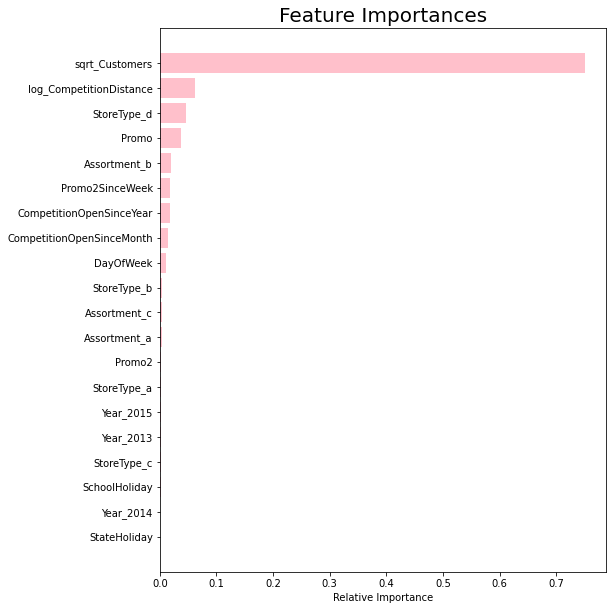

In [600]:
features = x_train.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')